In [9]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

%run '../backwards_time_voter_model.ipynb'

# Run backward voter model

In [11]:
# Set parameters
L = 300
alpha = 3e-3
kernel = 'fat tail'
W = 4
eta = -7.2

species = voter_model_fast(L, alpha, kernel='fat tail', W=W, eta=eta)

  4%|█▍                                   | 3398/90000 [00:16<07:11, 200.55it/s]


KeyboardInterrupt: 

## Fill grid for simulated ecosystems

In [12]:
# Fill grid for all simulated ecosystems
species_ids = np.random.uniform(size=len(species))

grid = np.zeros((L, L))
for i, specie in enumerate(species):
    for coord in specie:
        grid[coord] = species_ids[i]

## Plot ecosystem visualization as 2D grid for all model runs

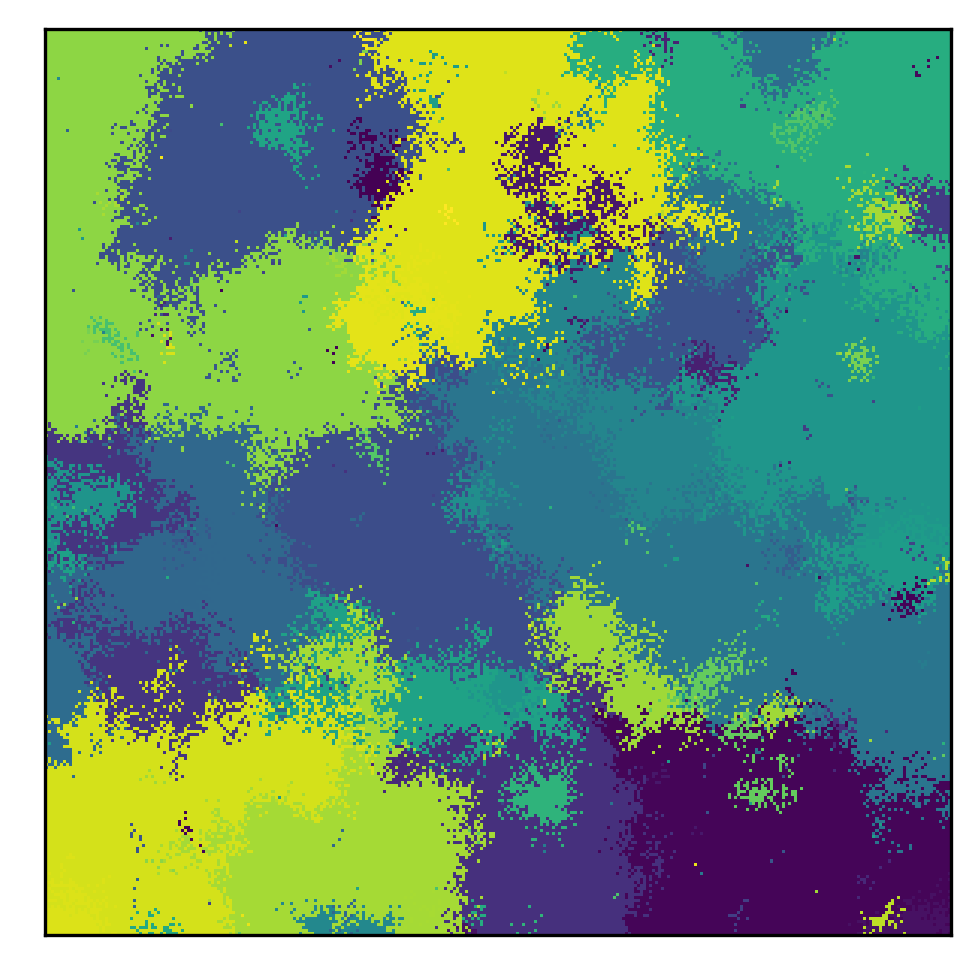

In [13]:
mpl.rc('font', size=8)

# Plot ecosystems
plt.imshow(grid)
plt.xticks([])
plt.yticks([])
        
plt.show()

## Plot Species-Area curve on log-log scale

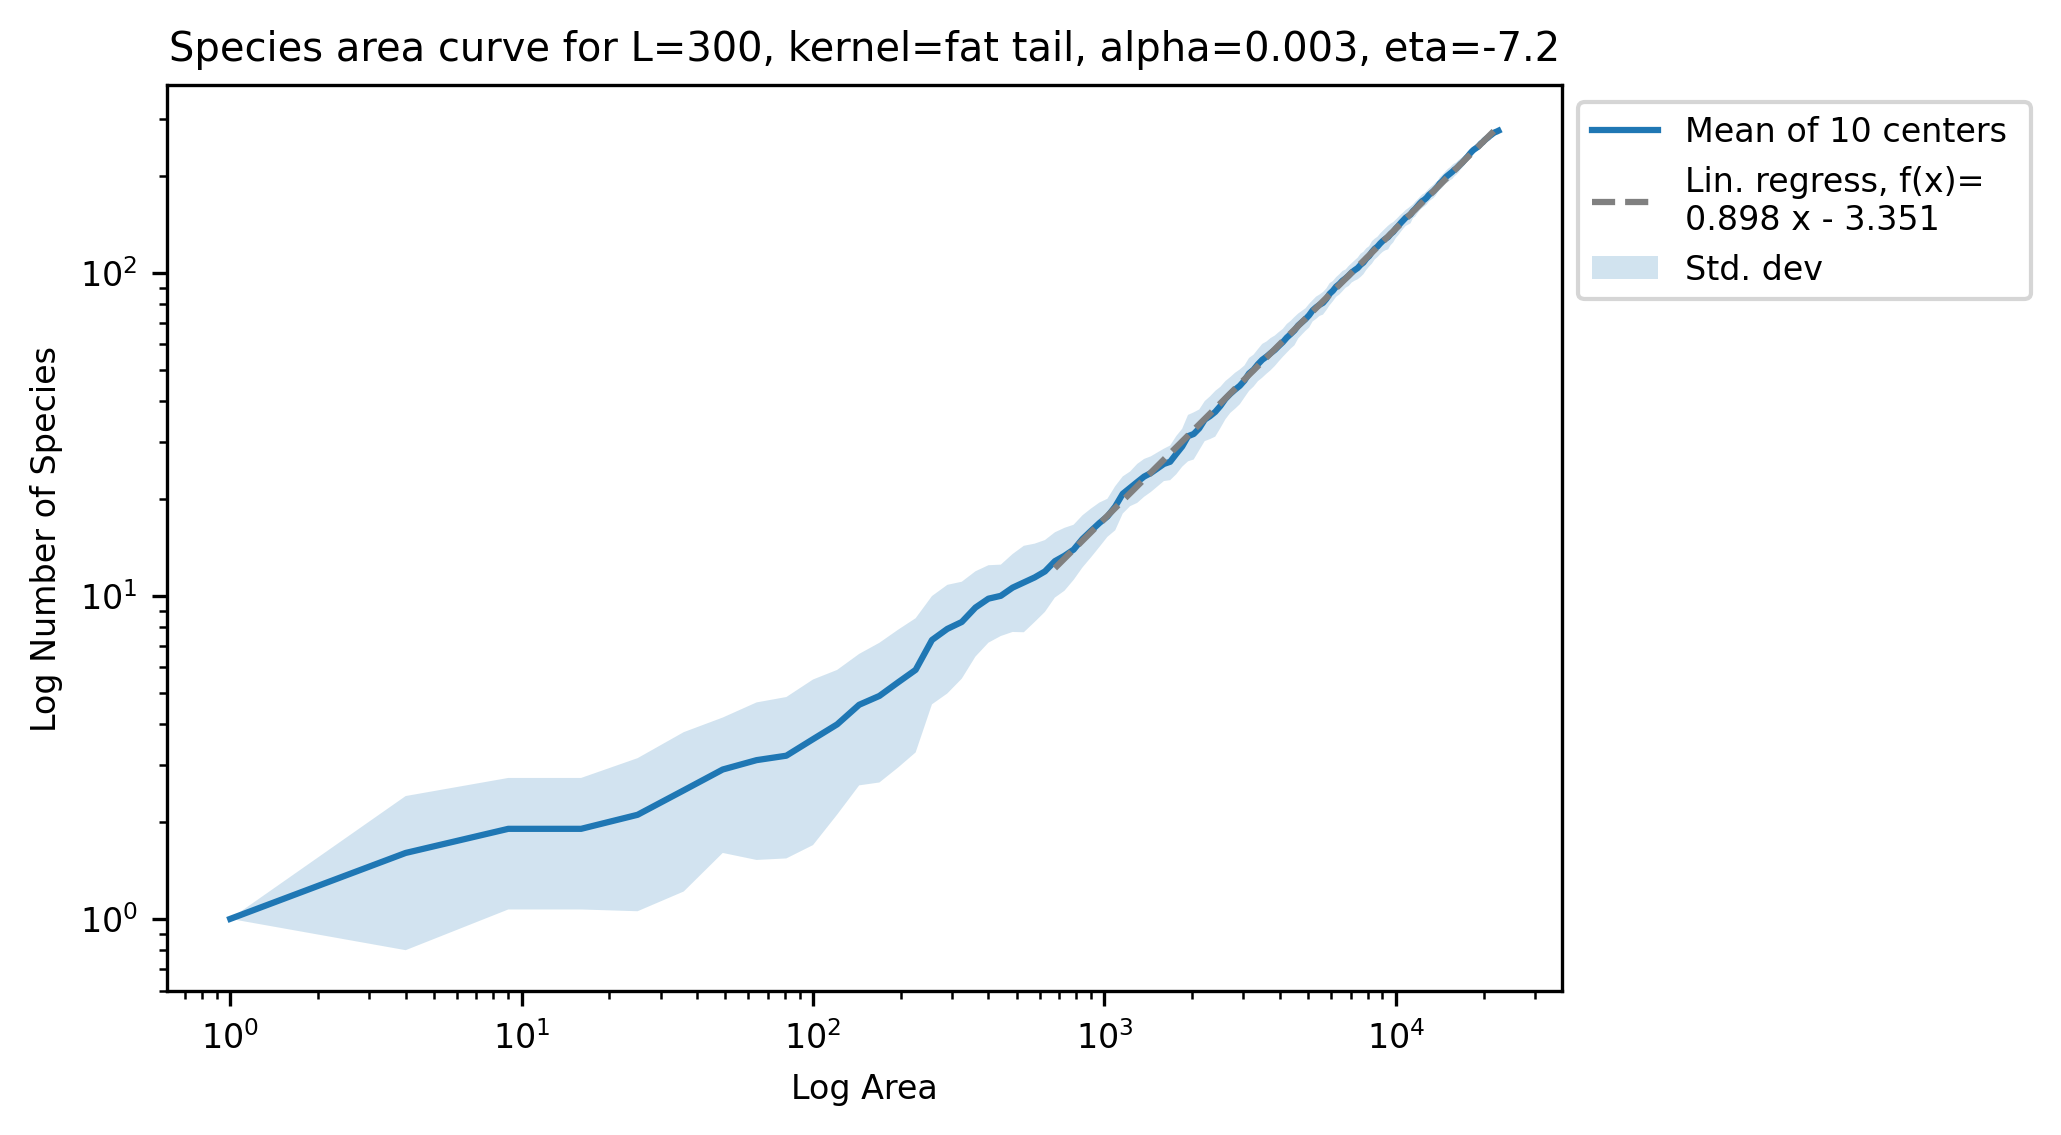

In [14]:
start_2 = 25


areas, num_species = sa_curve(grid,10)
spec_std_dev = np.std(num_species, axis=0)
spec_mean = np.mean(num_species, axis=0)

poly_coeffs2 = np.polyfit(np.log(areas)[start_2:], np.log(spec_mean)[start_2:], 1)
p2 = np.poly1d(poly_coeffs2)      

plt.loglog(areas, list(spec_mean), label=f'Mean of 10 centers ')

plt.loglog([areas[start_2], areas[-1]],
        np.exp(poly_coeffs2[1])*np.array([areas[start_2], areas[-1]])**poly_coeffs2[0],
        linestyle='dashed',
        color='grey',
        label=f'Lin. regress, f(x)={p2} ')

plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label=f'Std. dev')

plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for L={L}, kernel={kernel}, alpha={alpha}, eta={eta}')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## Plot Species-Area curve on normal axes

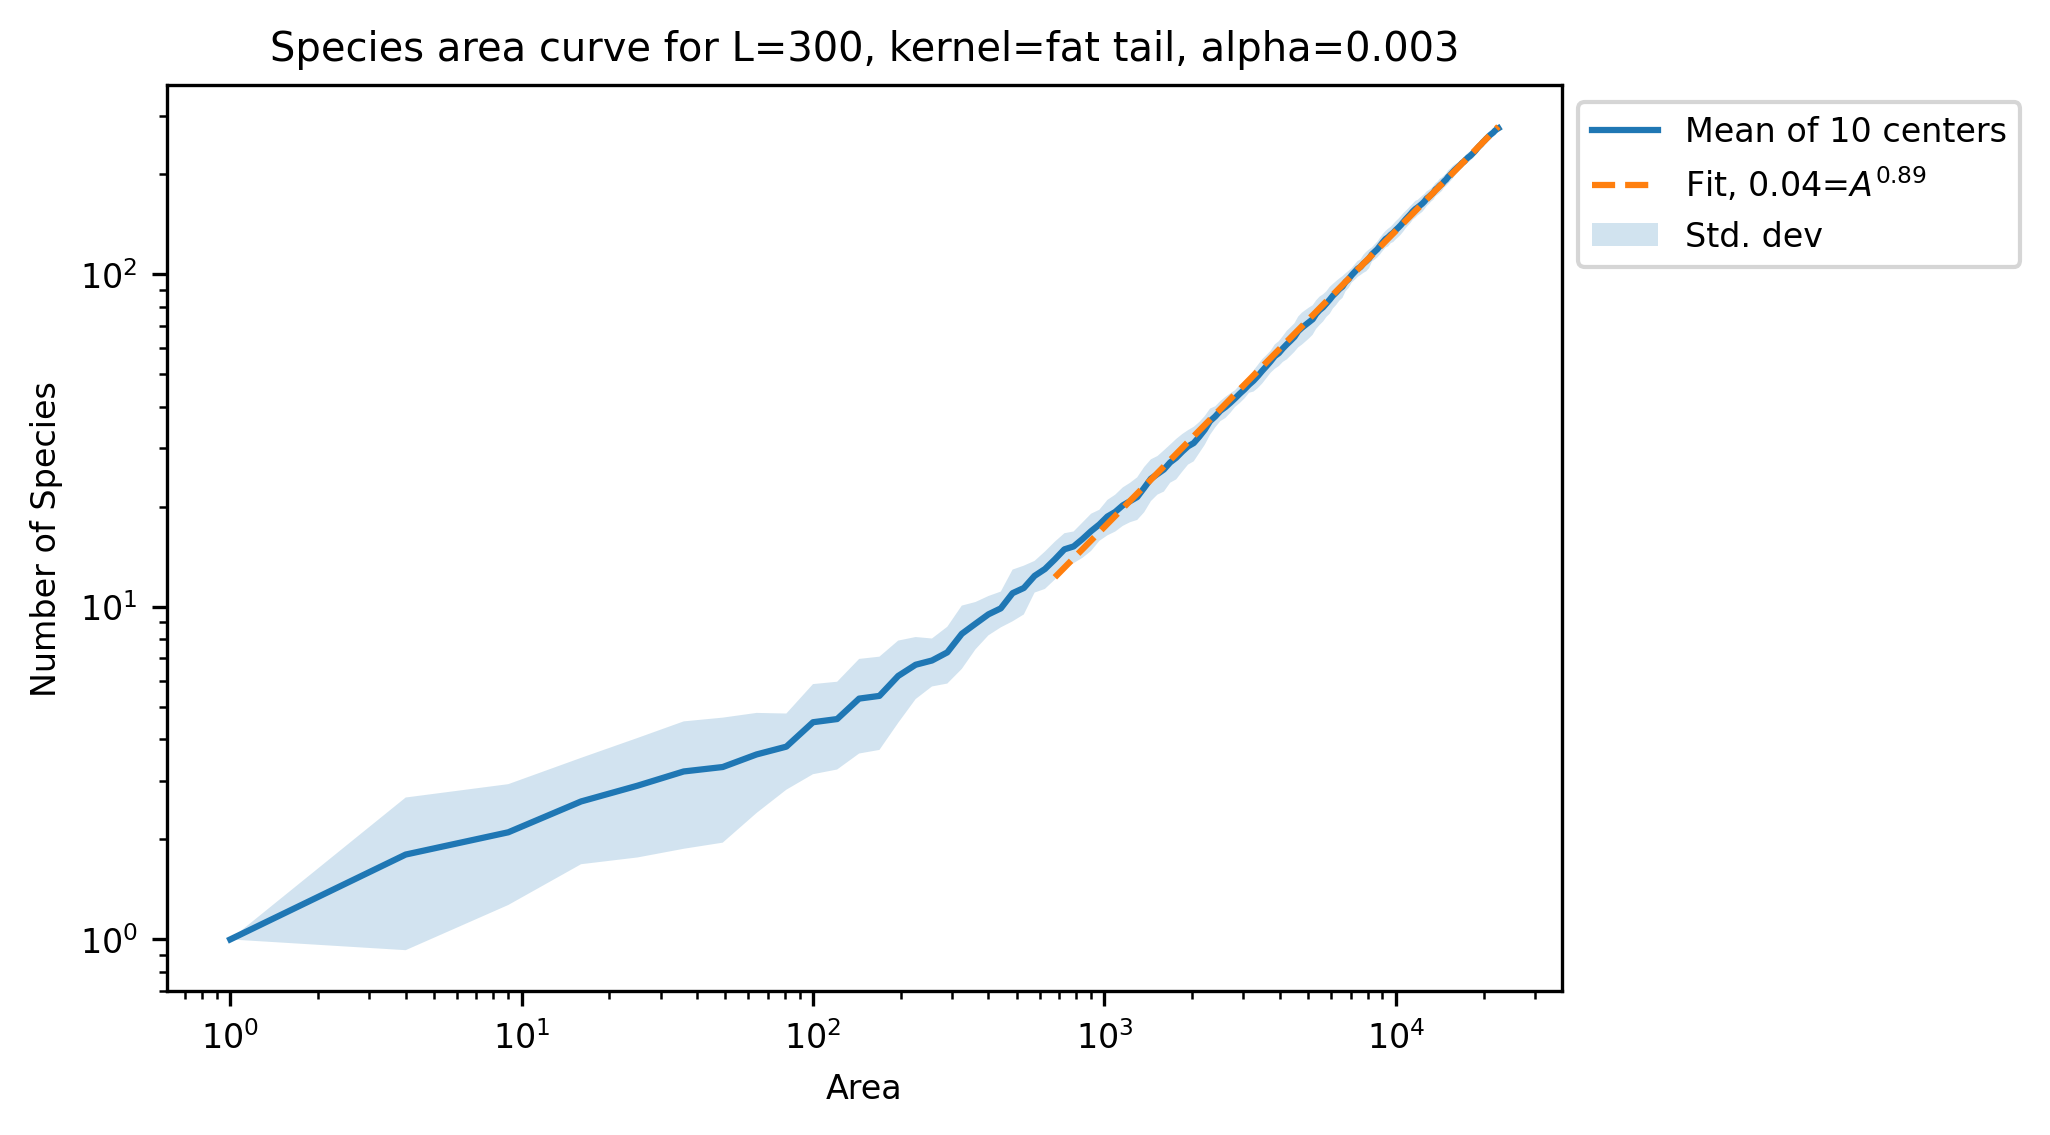

In [15]:
from scipy.optimize import curve_fit

def model_f(A, c, z):
    return c*A**z


areas, num_species = sa_curve(grid,10)
spec_std_dev = np.std(num_species, axis=0)
spec_mean = np.mean(num_species, axis=0)

(fit_c, fit_z), pcov = curve_fit(model_f, areas, spec_mean, p0=[0.1, 1])


plt.plot(areas, list(spec_mean), label=f'Mean of 10 centers')
plt.loglog([areas[start_2], areas[-1]],
           fit_c*np.array([areas[start_2], areas[-1]])**fit_z,
           linestyle='dashed',
           color='C1',
           label=rf'Fit, {round(fit_c, 2)}=$A^{{{round(fit_z, 2)}}}$')     
plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label=f'Std. dev')

plt.ylabel('Number of Species')
plt.xlabel('Area')
plt.title(f'Species area curve for L={L}, kernel={kernel}, alpha={alpha}')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## Plot fat tail distributions using kernel function for different values of eta

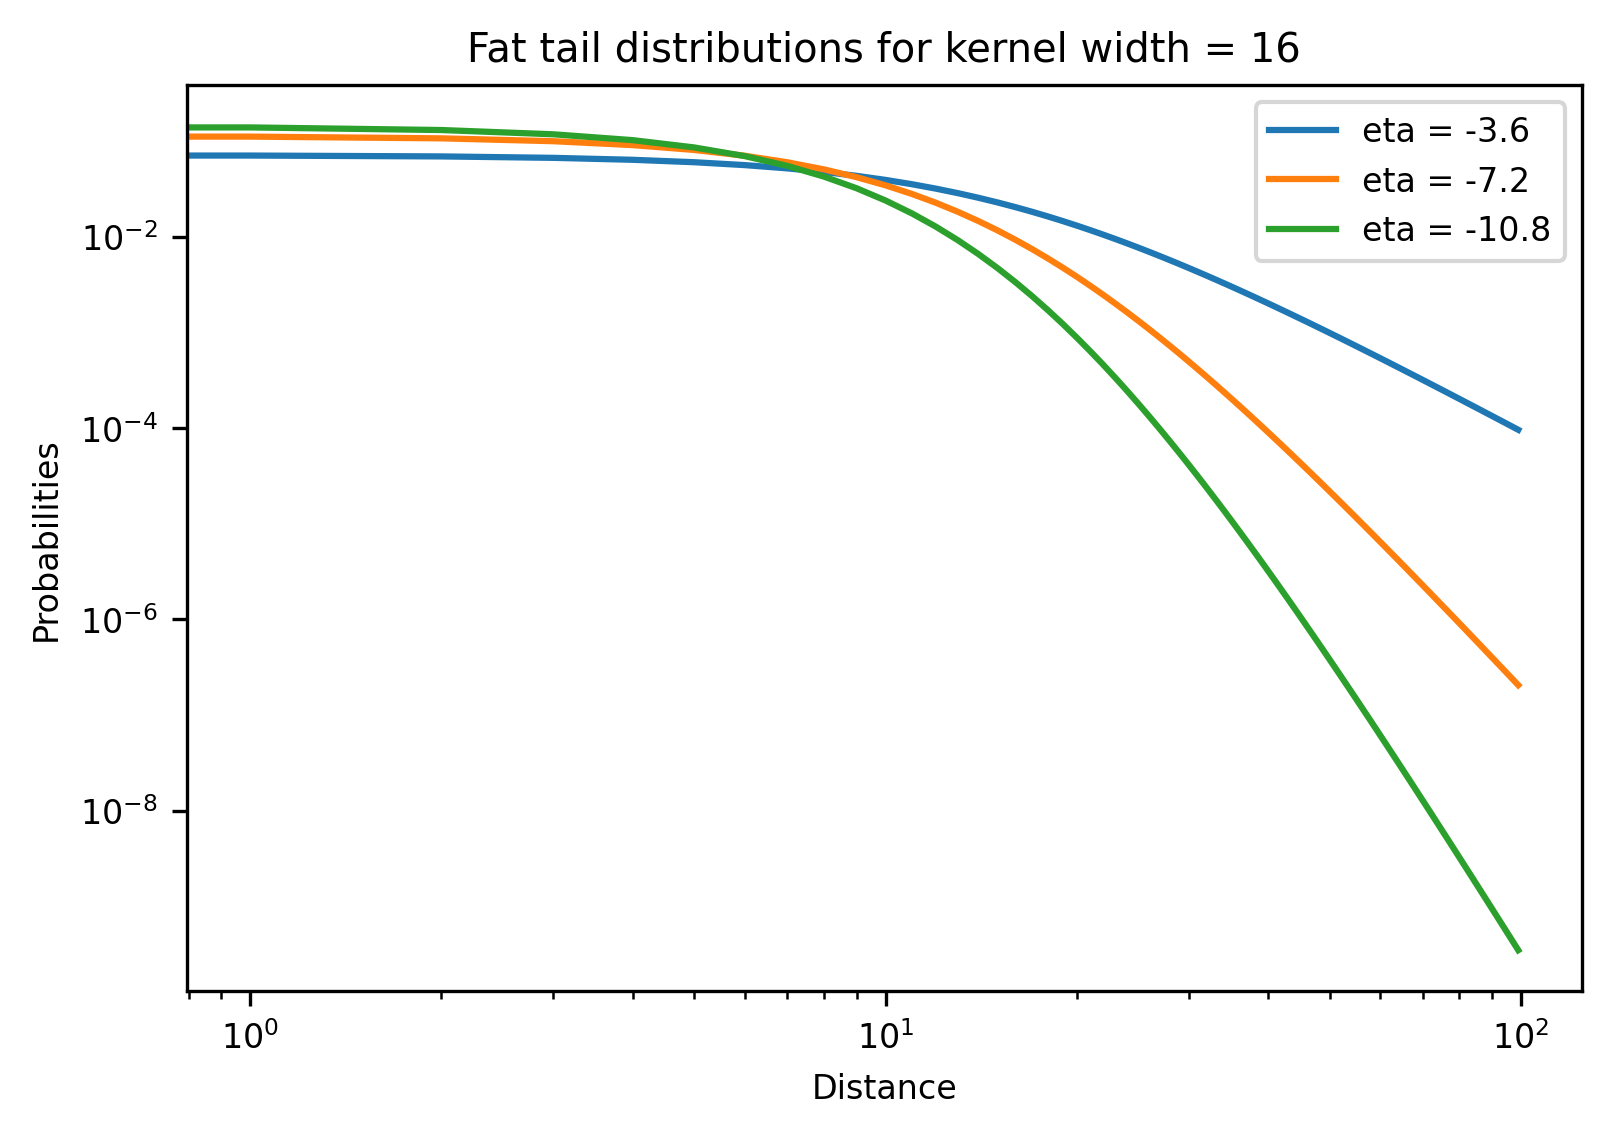

In [16]:
dist = range(0,100)
etas = [-3.6, -7.2, -10.8]
W = 16

for eta in etas:
    probabilities = []
    for d in dist:
        K = -((eta + 2) / (2 * np.pi * W**2)) * (1 + ((d)/W)**2 )**(eta/2)
        probabilities.append(K)
    probabilities = np.array(probabilities)/sum(probabilities)

    plt.loglog(dist,probabilities,label=f'eta = {eta}')

plt.legend()
plt.xlabel('Distance')
plt.ylabel('Probabilities')
plt.title(f'Fat tail distributions for kernel width = {W}')
plt.show()

## Plot fat tail distributions using kernel function for different values of kernel width

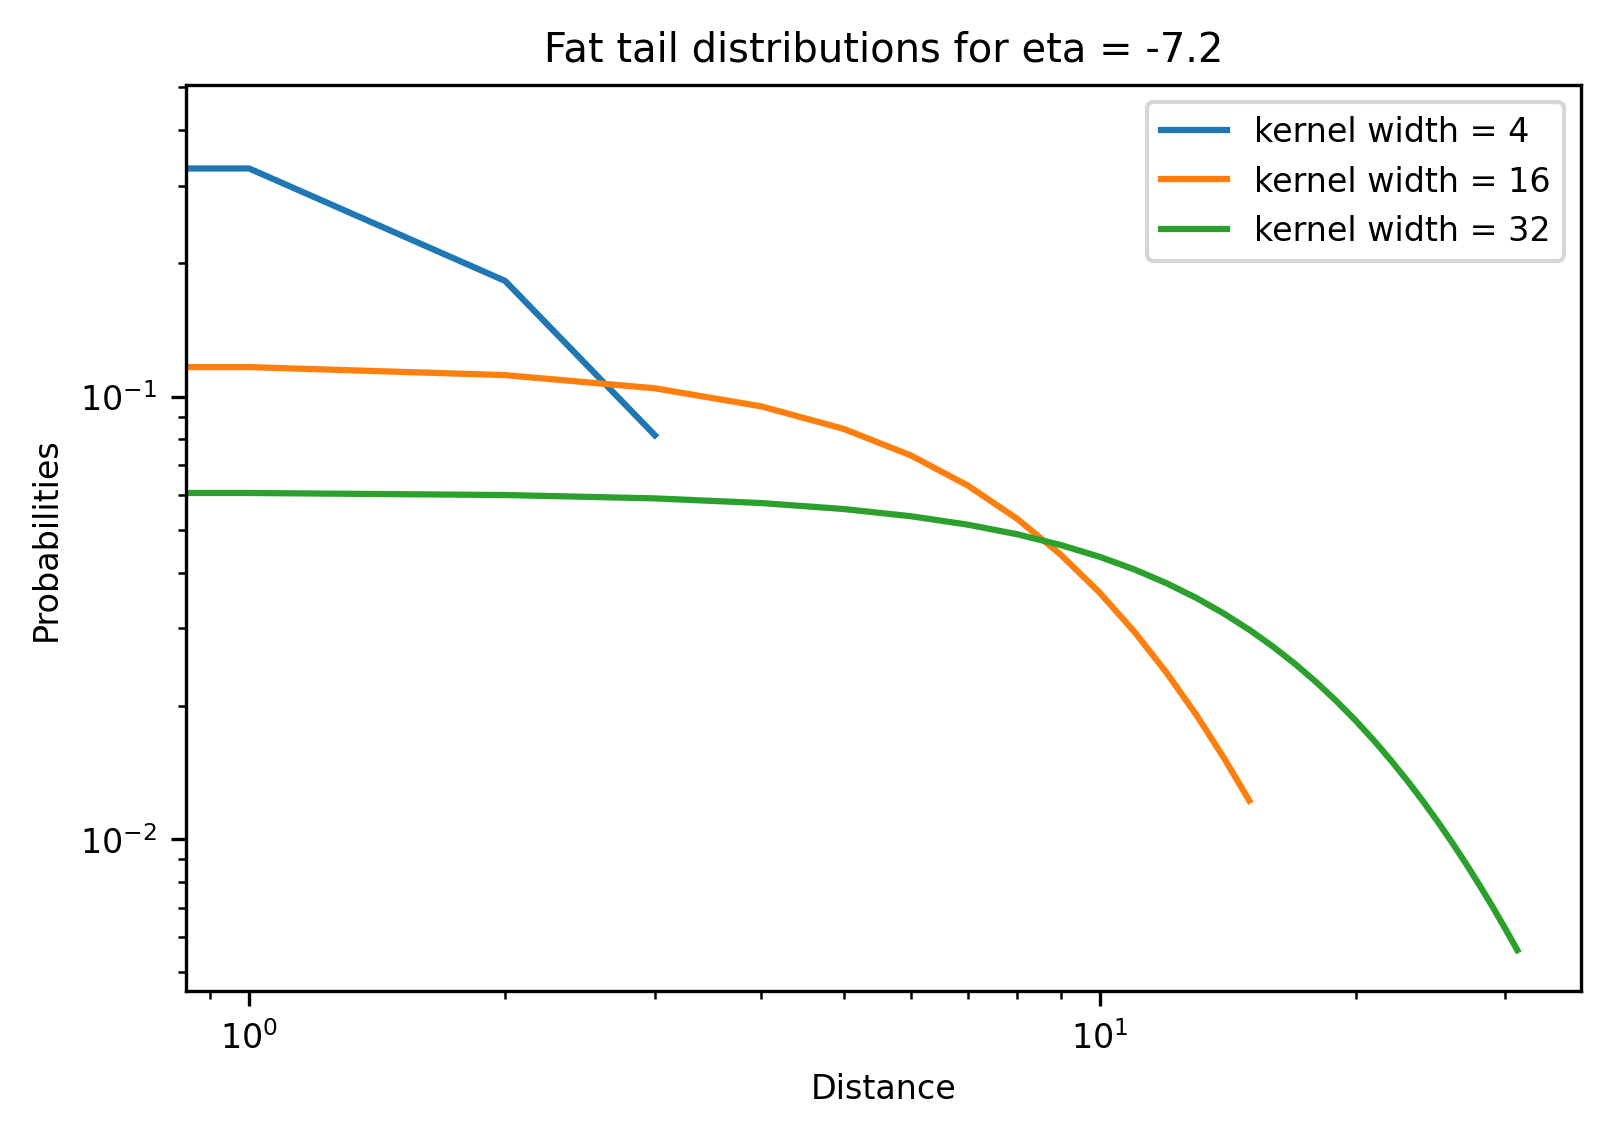

In [18]:
mpl.rc('font', size=8)

eta = -7.2
width = [4, 16, 32]

for W in width:
    probabilities = []
    dist = range(0, W)
    for d in dist:
        K = -((eta + 2) / (2 * np.pi * W**2)) * (1 + ((d)/W)**2 )**(eta/2)
        probabilities.append(K)
    probabilities = np.array(probabilities)/sum(probabilities)

    plt.loglog(dist,probabilities,label=f'kernel width = {W}')

plt.legend()
plt.xlabel('Distance')
plt.ylabel('Probabilities')
plt.title(f'Fat tail distributions for eta = {eta}')
plt.show()